Hello Mark!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

<!--[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]
-->

## Initialization

<b><u>Objective</u></b>

We are trying to ascertain which prepaid plan, Surf or Ultimate brings in more revenue in minutes, texts, and volume of data through the following steps:

1. Preprocessing the data
2. Analyzing the cleaned up data (statistical measures and visualizations)
3. Hypothesis testing (average revenue is the same between plans; average revenue in the NY-NJ area is the same as other regions)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start with an introduction!
</div>

In [1]:
# Loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math as mt
from math import factorial
from scipy import stats as st

## Load data

Load in the five data sets from Megaline.

In [2]:
# Load the data files into different DataFrames
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_internet = pd.read_csv('/datasets/megaline_internet.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

<!--[The data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]
-->
We are going to preprocess the data by checking for null values, checking the columns for their data types, and looking for duplicates.

In [3]:
# Looking into all the dataframes
print('CALLS')
print(df_calls.info())
print('\nINERNET')
print(df_internet.info())
print('\nMESSAGES')
print(df_messages.info())
print('\nPLANS')
print(df_plans.info())
print('\nUSERS')
print(df_users.info())

CALLS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

INERNET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

MESSAGES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 # 

In [4]:
# Showing a sample of each of the dataframes
print('CALLS\n', df_calls.sample(5))
print('\nINERNET\n', df_internet.sample(5))
print('\nMESSAGES\n', df_messages.sample(5))
print('\nPLANS\n', df_plans)
print('\nUSERS\n', df_users.sample(5))

CALLS
               id  user_id   call_date  duration
15854    1062_94     1062  2018-07-07      2.06
93885   1335_115     1335  2018-06-14      0.84
39284   1146_572     1146  2018-11-18      0.00
111735  1392_145     1392  2018-11-19      7.77
107970  1382_953     1382  2018-06-28      0.00

INERNET
              id  user_id session_date  mb_used
88792   1409_19     1409   2018-12-27   418.55
63800   1293_48     1293   2018-09-29   617.21
76065  1358_172     1358   2018-05-14   751.76
78354   1366_43     1366   2018-09-20   608.37
13707  1064_155     1064   2018-12-07   689.39

MESSAGES
              id  user_id message_date
50781  1330_397     1330   2018-12-26
36457  1242_129     1242   2018-11-25
51847  1335_438     1335   2018-11-10
38161  1251_213     1251   2018-06-23
62206  1391_195     1391   2018-12-13

PLANS
    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                

In [5]:
# Checking if all the plans match
print(df_users['plan'].unique())


['ultimate' 'surf']


In [6]:
# Getting an idea of how a user appears in each of the data sets
print('CALLS\n', df_calls[df_calls['user_id'] == 1196])
print('\nINERNET\n', df_internet[df_internet['user_id'] == 1196])
print('\nMESSAGES\n', df_messages[df_messages['user_id'] == 1196])
print('\nUSERS\n', df_users[df_users['user_id'] == 1196])
# print(df_users[~df_users['churn_date'].isna()])

CALLS
              id  user_id   call_date  duration
54126    1196_0     1196  2018-11-21      5.20
54127    1196_1     1196  2018-04-04     11.64
54128    1196_2     1196  2018-09-10      0.00
54129    1196_3     1196  2018-03-17     10.27
54130    1196_4     1196  2018-06-09     23.09
...         ...      ...         ...       ...
55053  1196_954     1196  2018-08-15      4.99
55054  1196_956     1196  2018-08-23      0.00
55055  1196_957     1196  2018-08-03      5.63
55056  1196_958     1196  2018-07-28     19.04
55057  1196_959     1196  2018-02-02      0.00

[932 rows x 4 columns]

INERNET
              id  user_id session_date  mb_used
44005    1196_0     1196   2018-02-05   819.20
44006    1196_1     1196   2018-05-16     0.00
44007    1196_2     1196   2018-04-24   590.12
44008    1196_3     1196   2018-02-18   468.69
44009    1196_4     1196   2018-07-16   788.32
...         ...      ...          ...      ...
44536  1196_552     1196   2018-10-10   248.86
44537  1196_553    

In [7]:
# Checking for any duplicates and the number of unique users
print('CALLS\n', df_calls[df_calls.duplicated()])
print('\nINERNET\n', df_internet[df_internet.duplicated()])
print('\nMESSAGES\n', df_messages[df_messages.duplicated()])
print('\nUSERS\n', df_users[df_users.duplicated()])
print()
print(df_calls['user_id'].nunique())
print(df_internet['user_id'].nunique())
print(df_messages['user_id'].nunique())

CALLS
 Empty DataFrame
Columns: [id, user_id, call_date, duration]
Index: []

INERNET
 Empty DataFrame
Columns: [id, user_id, session_date, mb_used]
Index: []

MESSAGES
 Empty DataFrame
Columns: [id, user_id, message_date]
Index: []

USERS
 Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []

481
489
402


We checked that there aren't any obvious duplicates for each of the data sets and that the number of users that appeared in each part of the plan (calls, texts, and internet usage). 

## Plans

In [8]:
# Print the general/summary information about the plans' DataFrame
print('PLANS')
print(df_plans.info())

PLANS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [9]:
# Print a sample of data for plans
print('\nPLANS\n', df_plans)


PLANS
    messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


<!--[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]
-->
In the plans data set, there are no nulls, duplicates or data types needing to be changed. No adjustments were made to this data set yet.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice initial review.
</div>

## Fix data

<!--[Fix obvious issues with the data given the initial observations.]-->

We are going to add a gigabyte per month included column for a later calculation since we charge extra per gigabyte.

In [10]:
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included']/1024


## Enrich data

<!--[Add additional factors to the data if you believe they might be useful.]
-->
We will check that the gb_per_month_included column was added correctly and ready for the calculations later.

In [11]:
df_plans.info()
print(df_plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
 8   gb_per_month_included  2 non-null      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 272.0+ bytes
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute p

## Users

In [12]:
# Print the general/summary information about the users' DataFrame
df_users.info()
print(df_users['plan'].unique())  # Making sure all users have a ultimate or surf plan

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
['ultimate' 'surf']


In [13]:
# Print a sample of data for users
df_users.sample(5)
# print(df_users[df_users['user_id']==1025])

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
364,1364,Clarine,Bonner,75,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-08-09,surf,NaN
154,1154,Humberto,Pruitt,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-07-18,ultimate,NaN
66,1066,Ariel,Woods,61,"Boston-Cambridge-Newton, MA-NH MSA",2018-03-08,surf,NaN
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01
411,1411,Man,Fleming,64,"Rochester, NY MSA",2018-08-10,surf,NaN


<!--[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]
-->
We will leave the churn_date column with null values since these are the customers that are still active.

### Fix Data

<!--[Fix obvious issues with the data given the initial observations.]
-->
For the users data, we check to see if a user might have multiple accounts under their name, so we check for duplicated first and last names or duplicated IDs. We will also make sure the city column is a string type for an analysis we will perform later on.

In [14]:
# Double checking just in case a user had multiple accounts
print('\nUSER NAMES\n', df_users[df_users[['first_name', 'last_name']].duplicated()].sort_values(by='last_name'))  
print('\nUSER IDS\n', df_users[df_users['user_id'].duplicated()])
# print(len(df_users['city'].unique()))


USER NAMES
 Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []

USER IDS
 Empty DataFrame
Columns: [user_id, first_name, last_name, age, city, reg_date, plan, churn_date]
Index: []


In [15]:
# Converting city into a string data type
np.array_equal(df_users['city'], df_users['city'].astype('str'))  
df_users['city'] = df_users['city'].astype(str)
# Saving users from the NY-NJ area
ny_nj_users = df_users[(df_users['city'].str.contains('NY')) | (df_users['city'].str.contains('NJ'))]
print(ny_nj_users)
# NY86, NJ97, NY_NJ80 
# df_users.iloc[377]  df['col'].str.contains('partial_string')


     user_id  first_name   last_name  age  \
14      1014     Edmundo       Simon   61   
22      1022          Bo        Snow   73   
24      1024        Yuki       Tyson   74   
27      1027  Georgeanna    Cardenas   38   
28      1028    Jefferey   Rasmussen   57   
..       ...         ...         ...  ...   
469     1469        Rory       Nixon   75   
482     1482      Armand       Glenn   70   
494     1494     Preston       Downs   70   
495     1495       Fidel      Sharpe   67   
498     1498        Scot  Williamson   51   

                                                city    reg_date      plan  \
14         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-11-25      surf   
22         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-04-20      surf   
24         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-08-21      surf   
27         New York-Newark-Jersey City, NY-NJ-PA MSA  2018-06-26      surf   
28   Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA  2018-02-21  ult

### Enrich Data

<!--[Add additional factors to the data if you believe they might be useful.]
-->
For comparisons and calculations later, we will create a column denoting which users are from the NY-NJ regions.

In [16]:
# add region column for NY-NJ users
def ny_nj_region(city):
    if ('NY'in city) | ('NJ'in city): #city.str.contains('NJ'): (city.str.contains('NY')) | (city.str.contains('NJ')):
        return 'ny-nj'

# (df_users['city'].str.contains('NY')) | (df_users['city'].str.contains('NJ'))
    
df_users['region'] = df_users['city'].apply(ny_nj_region)
# print(ny_nj_region('New York-Newark-Jersey City, NY-PA MSA'))
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
 8   region      103 non-null    object
dtypes: int64(2), object(7)
memory usage: 35.3+ KB


## Calls

In [17]:
# Print the general/summary information about the calls' DataFrame
# df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [18]:
# Print a sample of data for calls
df_calls.sample(5)


,id,user_id,call_date,duration
122275,1432_125,1432,2018-12-08,6.04
110364,1389_445,1389,2018-05-12,6.24
64310,1232_639,1232,2018-11-23,0.67
2461,1010_30,1010,2018-08-06,12.25
76672,1273_387,1273,2018-11-27,15.06


<!--[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]
-->
We are going to change the date columns to the appropriate datetime type to be able to work with it later on.

### Fix data

<!--[Fix obvious issues with the data given the initial observations.]-->
First, we have to make sure the date is formatted correctly.

In [19]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()
# print(df_calls[df_calls.duplicated()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enrich data

<!--[Add additional factors to the data if you believe they might be useful.]
-->
In order to do some of our calculations and comparisons, a month column will be created to the calls data in which the number of the month will be extracted from the call_date column.

In [20]:
df_calls['month'] = df_calls['call_date'].dt.month
print(df_calls.sample(10))
print(df_calls[df_calls['user_id']==1025])

              id  user_id  call_date  duration  month
68872   1247_205     1247 2018-11-10     11.19     11
4414    1018_338     1018 2018-11-05     20.00     11
33494   1126_179     1126 2018-10-26     17.02     10
23626    1088_12     1088 2018-07-31      0.00      7
52495   1187_688     1187 2018-08-09      0.00      8
76436    1271_59     1271 2018-12-31     11.33     12
107201  1380_418     1380 2018-10-02      0.25     10
23789   1088_274     1088 2018-12-01      4.47     12
115578  1404_372     1404 2018-10-14      7.08     10
55752   1199_455     1199 2018-10-07     14.18     10
Empty DataFrame
Columns: [id, user_id, call_date, duration, month]
Index: []


## Messages

In [21]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Print a sample of data for messages
df_messages.sample(4)


,id,user_id,message_date
10495,1076_1118,1076,2018-08-26
73809,1474_166,1474,2018-12-28
27861,1172_318,1172,2018-10-12
58839,1374_13,1374,2018-09-06


<!--[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]
-->
In order to do some of our calculations and comparisons, a month column will be created to the messages data in which the number of the month will be extracted from the message_date column.

### Fix data

<!--[Fix obvious issues with the data given the initial observations.]
-->
We first need to convert the message_date column into a datetime data type.

In [23]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

<!--[Add additional factors to the data if you believe they might be useful.]
-->
We add a month column to denote the month in which the message was sent. This will help for some calculations and comparisons later.

In [24]:
df_messages['month'] = df_messages['message_date'].dt.month
print(df_messages.sample(10))

             id  user_id message_date  month
23904  1144_400     1144   2018-11-01     11
5859   1054_226     1054   2018-10-21     10
66842  1434_394     1434   2018-07-10      7
12793   1084_33     1084   2018-10-28     10
32640  1203_285     1203   2018-06-18      6
39919  1258_410     1258   2018-10-09     10
52702  1336_729     1336   2018-06-15      6
32615  1203_260     1203   2018-05-02      5
40317  1260_139     1260   2018-12-07     12
27620   1172_77     1172   2018-12-12     12


## Internet

In [25]:
# Print the general/summary information about the internet DataFrame
df_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
# Print a sample of data for the internet traffic
df_internet.sample(4)


,id,user_id,session_date,mb_used
72383,1336_441,1336,2018-12-09,124.33
44323,1196_330,1196,2018-08-02,634.57
28866,1132_304,1132,2018-12-16,368.93
66824,1312_47,1312,2018-04-05,624.49


<!--[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]
-->
As of now, the session_date column is just and object type. We will convert that into a usable data type shortly.

### Fix data

<!--[Fix obvious issues with the data given the initial observations.]
-->
We want to reformat the session_date column into a datetime data type.

In [27]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

<!--[Add additional factors to the data if you believe they might be useful.]
-->
In order to do some comparisons later, we will add the month column to the internet data set.

In [28]:
df_internet['month'] = df_internet['session_date'].dt.month
print(df_internet.sample(5))

             id  user_id session_date  mb_used  month
3485    1020_25     1020   2018-12-22     0.00     12
64130   1294_51     1294   2018-10-11   906.16     10
93471   1436_94     1436   2018-10-06    56.42     10
65791  1304_319     1304   2018-12-28   278.72     12
15823   1072_42     1072   2018-11-24   436.01     11


## Study plan conditions

<!--[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]-->
We print out each of the plan's info to know how much is charged for each attribute of the plans.

In [29]:
# Print out the plan conditions and make sure they are clear for you
print(df_plans)
print(df_calls.sample())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  
            id  user_id  call_date  duration  month
92674  1334_42     1334 2018-04-23     11.41      4


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

## Aggregate data per user

<!--[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]
-->
We will create new dataframes out of the pivot tables created by the user IDs, the month, and the counts or sums of each type of telecom piece of data.

In [30]:
# Calculate the number of calls made by each user per month. Save the result.
calls_per_user = df_calls.groupby(['user_id', 'month'])['duration'].count().reset_index()
calls_per_user.columns = ['user_id', 'month', 'num_calls']  # inplace=True)
print(calls_per_user)
print(calls_per_user.head(12))
print(df_calls.groupby(['user_id', 'month'])['duration'].count().head(12))

      user_id  month  num_calls
0        1000     12         16
1        1001      8         27
2        1001      9         49
3        1001     10         65
4        1001     11         64
...       ...    ...        ...
2253     1498     12         39
2254     1499      9         41
2255     1499     10         53
2256     1499     11         45
2257     1499     12         65

[2258 rows x 3 columns]
    user_id  month  num_calls
0      1000     12         16
1      1001      8         27
2      1001      9         49
3      1001     10         65
4      1001     11         64
5      1001     12         56
6      1002     10         11
7      1002     11         55
8      1002     12         47
9      1003     12        149
10     1004      5         21
11     1004      6         44
user_id  month
1000     12        16
1001     8         27
         9         49
         10        65
         11        64
         12        56
1002     10        11
         11        55
         1

In [31]:
# Calculate the amount of minutes spent by each user per month. Save the result.
mins_per_user = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
mins_per_user['duration'] = np.ceil(mins_per_user['duration']) # Rounding up the duration column since the plans charge even if there is a decimal amount
print(mins_per_user)
# type(mins_per_user)

      user_id  month  duration
0        1000     12     117.0
1        1001      8     172.0
2        1001      9     298.0
3        1001     10     375.0
4        1001     11     405.0
...       ...    ...       ...
2253     1498     12     325.0
2254     1499      9     331.0
2255     1499     10     364.0
2256     1499     11     289.0
2257     1499     12     469.0

[2258 rows x 3 columns]


In [32]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user.columns = ['user_id', 'month', 'num_msgs']
print(messages_per_user)
# print(messages_per_user[messages_per_user['user_id']==1025])

      user_id  month  num_msgs
0        1000     12        11
1        1001      8        30
2        1001      9        44
3        1001     10        53
4        1001     11        36
...       ...    ...       ...
1801     1496      9        21
1802     1496     10        18
1803     1496     11        13
1804     1496     12        11
1805     1497     12        50

[1806 rows x 3 columns]


In [33]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
gb_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

gb_per_user['gb_used'] = gb_per_user['mb_used']/1024
gb_per_user['gb_used'] = np.ceil(gb_per_user['gb_used']) # Rounding up the gb_used column since the plans charge even if there is a decimal amount
print(gb_per_user)

      user_id  month   mb_used  gb_used
0        1000     12   1901.47      2.0
1        1001      8   6919.15      7.0
2        1001      9  13314.82     14.0
3        1001     10  22330.49     22.0
4        1001     11  18504.30     19.0
...       ...    ...       ...      ...
2272     1498     12  23137.69     23.0
2273     1499      9  12984.76     13.0
2274     1499     10  19492.43     20.0
2275     1499     11  16813.83     17.0
2276     1499     12  22059.21     22.0

[2277 rows x 4 columns]


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

<!--[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]
-->
For each user and each of their months, we will make a new dataframe using an outer merge. Nulls should fill months that might have one or more pieces of info missing since not every customer uses each part of their plan. We will fill the nulls in with appropriate info what is needed for calculation later on.

In [34]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# user_month_merge = calls_per_user, mins_per_user, messages_per_user, gb_per_user
calls_merge = calls_per_user.merge(mins_per_user, on=['user_id', 'month'], how='outer')
print(calls_merge)
calls_msg_merge = calls_merge.merge(messages_per_user, on=['user_id', 'month'], how='outer')
print(calls_msg_merge.info())
# print(calls_msg_merge[calls_msg_merge['user_id']==1499])
calls_msg_gb_merge = calls_msg_merge.merge(gb_per_user, on=['user_id', 'month'], how='outer')
print(calls_msg_gb_merge)

      user_id  month  num_calls  duration
0        1000     12         16     117.0
1        1001      8         27     172.0
2        1001      9         49     298.0
3        1001     10         65     375.0
4        1001     11         64     405.0
...       ...    ...        ...       ...
2253     1498     12         39     325.0
2254     1499      9         41     331.0
2255     1499     10         53     364.0
2256     1499     11         45     289.0
2257     1499     12         65     469.0

[2258 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2291 entries, 0 to 2290
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2291 non-null   int64  
 1   month      2291 non-null   int64  
 2   num_calls  2258 non-null   float64
 3   duration   2258 non-null   float64
 4   num_msgs   1806 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 107.4 KB
None
      user_id  month  num_ca

In [35]:
# Add the plan information
user_month_merge = df_users.merge(calls_msg_gb_merge, on='user_id', how='outer')
# print(user_month_merge.info())
user_month_merged = user_month_merge[~user_month_merge['month'].isna()].reset_index(drop=True)  # removing the 10 user_ids that don't have any data
print(user_month_merged.info())
user_month_merged = user_month_merged.drop(['first_name', 'last_name', 'age', 'city', 'reg_date', 'churn_date'], axis='columns')  # Removing unnecessary columns
user_month_merged['region'] = user_month_merged['region'].fillna('')  # Filling in null values with empty string
user_month_merged[['num_calls', 'duration', 'num_msgs', 'mb_used', 'gb_used']] = user_month_merged[['num_calls', 'duration', 'num_msgs', 'mb_used', 'gb_used']].fillna(0)  # Filling in null values with 0
print(user_month_merged.info())
print(user_month_merged)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   user_id     2293 non-null   int64  
 1   first_name  2293 non-null   object 
 2   last_name   2293 non-null   object 
 3   age         2293 non-null   int64  
 4   city        2293 non-null   object 
 5   reg_date    2293 non-null   object 
 6   plan        2293 non-null   object 
 7   churn_date  158 non-null    object 
 8   region      488 non-null    object 
 9   month       2293 non-null   float64
 10  num_calls   2258 non-null   float64
 11  duration    2258 non-null   float64
 12  num_msgs    1806 non-null   float64
 13  mb_used     2277 non-null   float64
 14  gb_used     2277 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 268.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 9 columns):
 #   Column     Non-N

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Correct.
</div>

<!--[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]
-->
Now, we will create a function that will calculate the revenue for each user and each of their months. This will be added as another row to the end of the user_month_merged data set.

In [36]:
# Calculate the monthly revenue for each user
# Creating a function to call into the apply() method to create a new revenue column
def compute_monthly_bill(row):
    plan = row['plan']
    mins = row['duration']
    texts = row['num_msgs']
    gb = row['gb_used']
    cost = 0
    if plan == 'surf':
        cost += 20
        if mins > 500:
            cost += (mins - 500)*.03
            if texts > 50:
                cost += (texts - 50) * .03
                if gb > 15:
                    cost += (gb - 15) * 10
            else:
                if gb > 15:
                    cost += (gb - 15) * 10
        else:
            if texts > 50:
                cost += (texts - 50) * .03
                if gb > 15:
                    cost += (gb - 15) * 10
            else:
                if gb > 15:
                    cost += (gb - 15) * 10
    else:  # plan == ultimate
        cost += 70
        if mins > 3000:
            cost += (mins - 3000) * .01
            if texts > 1000:
                cost += (texts - 1000) * .01
                if gb > 30:
                    cost += (gb - 30) * 7
            else:
                if gb > 30:
                    cost += (gb - 30) * 7
        else:
            if texts > 1000:
                cost += (texts - 1000) * .01
                if gb > 30:
                    cost += (gb - 30) * 7
            else:
                if gb > 30:
                    cost += (gb - 30) * 7
    return cost

print(compute_monthly_bill(user_month_merged.iloc[2292]))  # testing a single row

90.0


<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good function, but it's not a good practice to hardcode values. It's better to use variables/links. In our case we can get all information from plan df.
</div>

In [37]:
user_month_merged['revenue'] = user_month_merged.apply(compute_monthly_bill, axis=1)
print(user_month_merged.info())
print(user_month_merged)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    2293 non-null   int64  
 1   plan       2293 non-null   object 
 2   region     2293 non-null   object 
 3   month      2293 non-null   float64
 4   num_calls  2293 non-null   float64
 5   duration   2293 non-null   float64
 6   num_msgs   2293 non-null   float64
 7   mb_used    2293 non-null   float64
 8   gb_used    2293 non-null   float64
 9   revenue    2293 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 179.3+ KB
None
      user_id      plan region  month  num_calls  duration  num_msgs  \
0        1000  ultimate          12.0       16.0     117.0      11.0   
1        1001      surf           8.0       27.0     172.0      30.0   
2        1001      surf           9.0       49.0     298.0      44.0   
3        1001      surf          10.0       65.0     375

Now, we have compiled a data set that gives each user's plan usage among the three aspects of their plans and the revenue from each month. This will allow us to compare between the Surf and Ultimate plans.

## Study user behaviour

<!--[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]
-->
In this section, we will be creating descriptive statistics and visualizations to help compare the similarities and differences between the Surf and Ultimate plans. We will individually looks at the four parts of each plan: call duration, text message frequency, internet usage, and revenue.

### Calls

plan      month
surf      1.0      193.000000
          2.0      281.333333
          3.0      311.434783
          4.0      332.920000
          5.0      377.532468
          6.0      407.690722
          7.0      425.000000
          8.0      387.660494
          9.0      391.453608
          10.0     406.202532
          11.0     400.067138
          12.0     447.984277
ultimate  1.0      183.750000
          2.0      380.428571
          3.0      286.166667
          4.0      317.095238
          5.0      384.206897
          6.0      350.361702
          7.0      404.271186
          8.0      397.788732
          9.0      413.779070
          10.0     425.698113
          11.0     420.944882
          12.0     433.549669
Name: duration, dtype: float64


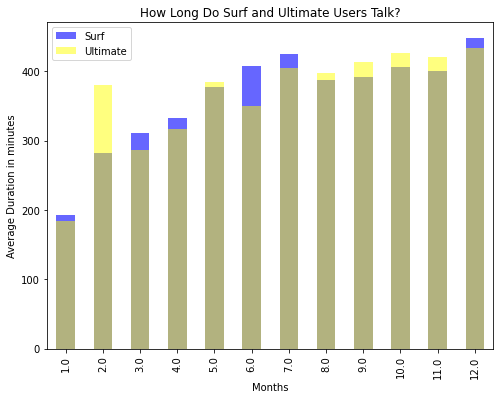

In [38]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plot to visualize it.
df_plan_month_calls = user_month_merged.groupby(['plan', 'month'])['duration'].mean()  #.reset_index()
print(df_plan_month_calls)
# Bar plot
df_plan_month_calls['surf'].plot(
    kind='bar',
    title='How Long Do Surf and Ultimate Users Talk?',
    ylabel='Average Duration in minutes',
    figsize=[8,6], 
    color='blue',
    alpha=.6
)
df_plan_month_calls['ultimate'].plot(
    kind='bar', 
    color='yellow',
    alpha=.5
)
plt.xlabel('Months')
plt.legend(['Surf', 'Ultimate'])
plt.show()

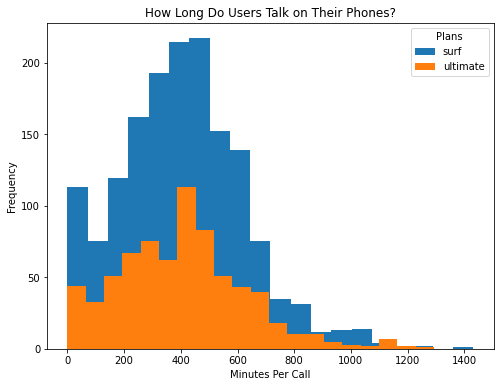

In [39]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
# print(user_month_merged.groupby('plan')['duration'])
user_month_merged.groupby('plan')['duration'].plot(
    kind='hist',
    bins=20,
    title='How Long Do Users Talk on Their Phones?',
    figsize=[8,6]
)
plt.legend(title='Plans')
plt.xlabel('Minutes Per Call')
plt.show()


<!--[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]
-->
To further examine each plan, we will calculate some descriptive statistics. 

In [40]:
# Calculate the mean and the variance of the monthly call duration
print('Average Call Duration:\n', user_month_merged.groupby('plan')['duration'].mean())
print('\nCall Duration Variance:\n', user_month_merged.groupby('plan')['duration'].var())
print('\nCall Duration Standard Deviation:\n', user_month_merged.groupby('plan')['duration'].std())
print('\nCall Duration Descriptive Statistics:\n', user_month_merged.groupby('plan')['duration'].describe())
#print(user_month_merged.groupby('plan')['duration'].sum())

Average Call Duration:
 plan
surf        405.250477
ultimate    406.708333
Name: duration, dtype: float64

Call Duration Variance:
 plan
surf        49143.993201
ultimate    51651.661683
Name: duration, dtype: float64

Call Duration Standard Deviation:
 plan
surf        221.684445
ultimate    227.270019
Name: duration, dtype: float64

Call Duration Descriptive Statistics:
            count        mean         std  min    25%    50%    75%     max
plan                                                                      
surf      1573.0  405.250477  221.684445  0.0  256.0  402.0  544.0  1432.0
ultimate   720.0  406.708333  227.270019  0.0  247.0  399.0  532.5  1293.0


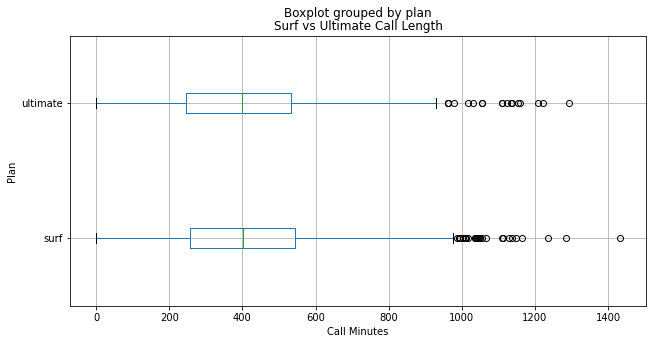

In [41]:
# Plot a boxplot to visualize the distribution of the monthly call duration

user_month_merged.boxplot(
    column='duration', 
    by='plan',
    figsize=[10,5],
    vert = 0
)

plt.title('Surf vs Ultimate Call Length')
plt.ylabel('Plan')
plt.xlabel('Call Minutes')
plt.show()

<!--[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]
-->

Overall, the call duration between the plans are very similar, so the customer's behaviors regarding call duration tend to be the same. For further examination, we looked at the following:

* The Bar Graphs showed similar length of calls for most of the months except for February, which the Ultimate users had about 100 minutes more on average, and June, where Surf users had about 60 minutes more.
* The Histogram of both plans showed a similar, right tailed shape that centered around 400 minutes. However, there are more Surf users than Ultimate users, so the distribution for the Ultimate users was shorter.
* With the Descriptive Statistics, we see that the means, standard deviation, and quartiles are close in values, so user behavior with call length tends to be the same. 
* As seen with the similar quartiles, the Boxplot for both plans have very similar shapes, with the IQR in the same area and a longer upper (or right) tail, which reinforces what the histogram shows. So, again, the users call length are similar between the plans.

### Messages

plan      month
surf      1.0      10.500000
          2.0      12.000000
          3.0      15.260870
          4.0      17.400000
          5.0      24.012987
          6.0      25.298969
          7.0      27.033058
          8.0      28.777778
          9.0      30.762887
          10.0     33.839662
          11.0     32.385159
          12.0     38.600629
ultimate  1.0      15.500000
          2.0      21.571429
          3.0      20.250000
          4.0      22.047619
          5.0      32.103448
          6.0      29.340426
          7.0      32.830508
          8.0      38.478873
          9.0      37.895349
          10.0     39.443396
          11.0     38.606299
          12.0     45.006623
Name: num_msgs, dtype: float64


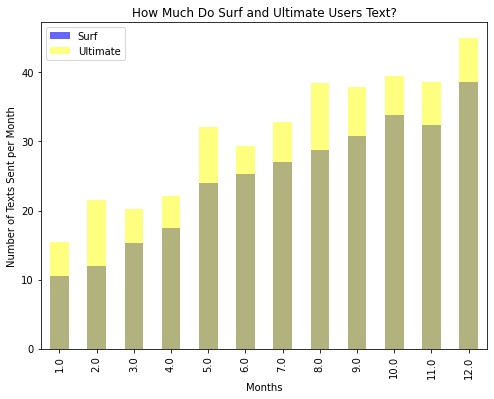

In [42]:
# Compare the number of messages users of each plan tend to send each month
df_plan_month_msgs = user_month_merged.groupby(['plan', 'month'])['num_msgs'].mean()
print(df_plan_month_msgs)

df_plan_month_msgs['surf'].plot(
    kind='bar',
    title='How Much Do Surf and Ultimate Users Text?',
    ylabel='Number of Texts Sent per Month',
    figsize=[8,6], 
    color='blue',
    alpha=.6
)
df_plan_month_msgs['ultimate'].plot(
    kind='bar', 
    color='yellow',
    alpha=.5
)
plt.xlabel('Months')
plt.legend(['Surf', 'Ultimate'])
plt.show()

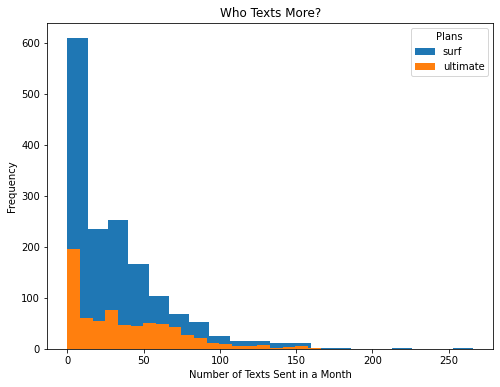

In [60]:
# Compare the number of texts users of each plan require each month. Plot a histogram.
user_month_merged.groupby('plan')['num_msgs'].plot(
    kind='hist',
    bins=20,
    title='Who Texts More?',
    figsize=[8,6]
)
plt.legend(title='Plans')
plt.xlabel('Number of Texts Sent in a Month')
plt.show()

In [44]:
# Calculate the mean and the variance of the monthly texts sent
print(user_month_merged.groupby('plan')['num_msgs'].mean())
print(user_month_merged.groupby('plan')['num_msgs'].var())
print(user_month_merged.groupby('plan')['num_msgs'].std())
print(user_month_merged.groupby('plan')['num_msgs'].describe())

plan
surf        31.159568
ultimate    37.551389
Name: num_msgs, dtype: float64
plan
surf        1126.724522
ultimate    1208.756744
Name: num_msgs, dtype: float64
plan
surf        33.566717
ultimate    34.767179
Name: num_msgs, dtype: float64
           count       mean        std  min  25%   50%   75%    max
plan                                                               
surf      1573.0  31.159568  33.566717  0.0  3.0  24.0  47.0  266.0
ultimate   720.0  37.551389  34.767179  0.0  7.0  30.0  61.0  166.0


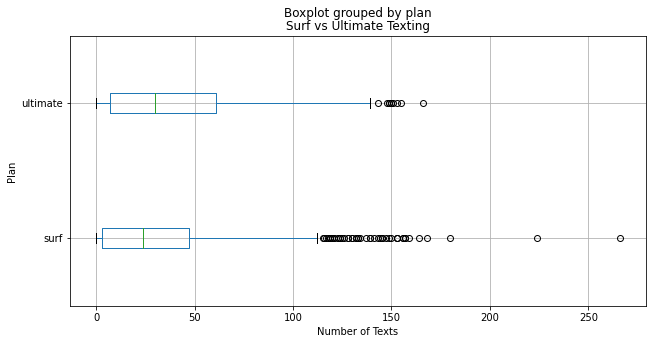

In [45]:
# Plot a boxplot to visualize the distribution of the monthly texts sent

user_month_merged.boxplot(
    column='num_msgs', 
    by='plan',
    figsize=[10,5],
    vert = 0
)

plt.title('Surf vs Ultimate Texting')
plt.ylabel('Plan')
plt.xlabel('Number of Texts')
plt.show()

<!--[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]-->

Overall, the number of text sent in a month tended to be a little higher for the Ultimate users. Since the Ultimate plan has a higher allotment of texts, this could play a large part for why it was higher than Surf users. We see this in the following:

* The Bar Graphs showed that every month the Ultimate users outpaced the Surf users by at least five texts.
* Although the shapes of the Histograms seemed similar, the Surf users had a bulk of users below 50 texts, which is probably due to their text limit. For the Ultimate users, their values look more spread out with only a peak towards zero texts. 
* When looking at the Descriptive Statistics, we see that the mean and quartiles are higher in the Ultimate users.
* In the Boxplot, we see the IQR of the Ultimate users shifted higher than the Surf users. 

### Internet

plan      month
surf      1.0       5.000000
          2.0      12.222222
          3.0      13.565217
          4.0      12.220000
          5.0      14.116883
          6.0      15.484536
          7.0      16.876033
          8.0      16.882716
          9.0      16.690722
          10.0     17.409283
          11.0     16.431095
          12.0     18.238994
ultimate  1.0       7.250000
          2.0      17.285714
          3.0      18.416667
          4.0      16.333333
          5.0      16.862069
          6.0      15.425532
          7.0      16.491525
          8.0      17.845070
          9.0      17.011628
          10.0     17.716981
          11.0     17.118110
          12.0     18.397351
Name: gb_used, dtype: float64


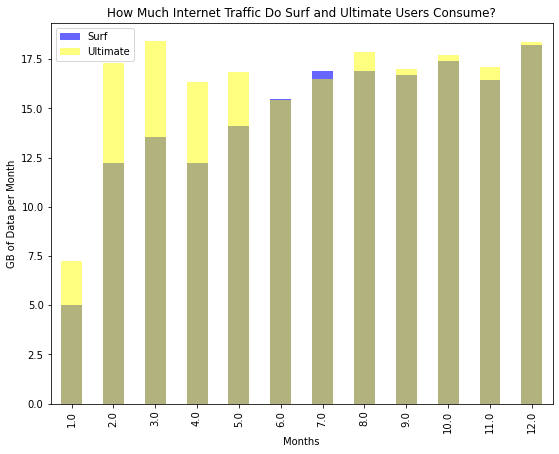

In [61]:
# Compare the amount of internet traffic consumed by users of each plan tend to send each month
df_plan_month_internet = user_month_merged.groupby(['plan', 'month'])['gb_used'].mean()
print(df_plan_month_internet)

df_plan_month_internet['surf'].plot(
    kind='bar',
    title='How Much Internet Traffic Do Surf and Ultimate Users Consume?',
    ylabel='GB of Data per Month',
    figsize=[9,7], 
    color='blue',
    alpha=.6
)
df_plan_month_internet['ultimate'].plot(
    kind='bar', 
    color='yellow',
    alpha=.5
)
plt.xlabel('Months')
plt.legend(['Surf', 'Ultimate'])
plt.show()

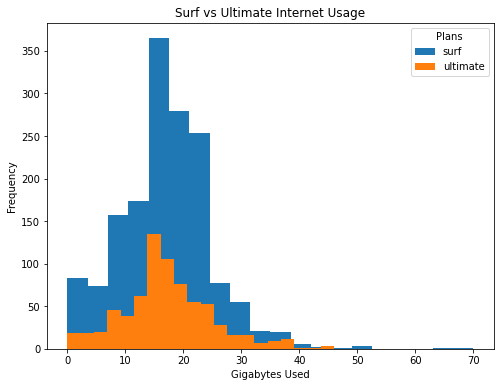

In [59]:
# Compare the number of internet traffic users of each plan require each month. Plot a histogram.
user_month_merged.groupby('plan')['gb_used'].plot(
    kind='hist',
    bins=20,
    title='Surf vs Ultimate Internet Usage',
    figsize = [8,6]
)
plt.legend(title='Plans')
plt.xlabel('Gigabytes Used')
plt.show()

In [48]:
# Calculate the mean and the variance of the monthly internet usage
print('Internet Usage Averages per Plan:\n', user_month_merged.groupby('plan')['gb_used'].mean())
print('\nInternet Usage Variance:\n', user_month_merged.groupby('plan')['gb_used'].var())
print('\nInternet Usage Standard Deviation:\n', user_month_merged.groupby('plan')['gb_used'].std())
print('\nInternet Usage Descriptive Statistics:\n', user_month_merged.groupby('plan')['gb_used'].describe())

Internet Usage Averages per Plan:
 plan
surf        16.670693
ultimate    17.306944
Name: gb_used, dtype: float64

Internet Usage Variance:
 plan
surf        61.58360
ultimate    58.83055
Name: gb_used, dtype: float64

Internet Usage Standard Deviation:
 plan
surf        7.847522
ultimate    7.670108
Name: gb_used, dtype: float64

Internet Usage Descriptive Statistics:
            count       mean       std  min   25%   50%   75%   max
plan                                                              
surf      1573.0  16.670693  7.847522  0.0  12.0  17.0  21.0  70.0
ultimate   720.0  17.306944  7.670108  0.0  13.0  17.0  21.0  46.0


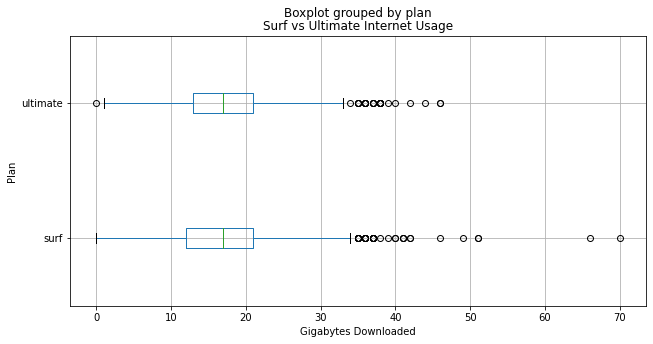

In [49]:
# Plot a boxplot to visualize the distribution of the monthly call duration
user_month_merged.boxplot(
    column='gb_used', 
    by='plan',
    figsize=[10,5],
    vert = 0
)

plt.title('Surf vs Ultimate Internet Usage')
plt.ylabel('Plan')
plt.xlabel('Gigabytes Downloaded')
plt.show()

<!--[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]-->

After examining the internet useage between plans, there were both similarities and differences as shown below:

* When we plotted the Bar Graphs per month, we noticed that Ultimate users most often had higher internet usage except for June and July, but only by a little. It should also be noted that the Ultimate plan has a higher allotment for gigabytes, which may have an affect on the users of that plan to consume more internet.
* The Histogram of both plans showed a similar shape centering their peaks close together. But, since there are more Surf users than Ultimate users, the distribution for the Surf users was higher.
* The Descriptive Statistics showed that the means, standard deviation, and quartiles are close in values, so user behavior with internet usage tends to be the same.
* As seen with the similar quartiles, the Boxplot for both plans have very similar shapes, with the IQRs in generally the same area and outliers far to the right. But, there were higher outliers for some Surf plan users, which would have created more revenue in the end.

## Revenue

<!--[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]-->
Next, we will take a look at the behavior of the users through the revenue they bring in.

plan      month
surf      1.0      20.000000
          2.0      34.260000
          3.0      45.792609
          4.0      40.458600
          5.0      47.240130
          6.0      48.935155
          7.0      62.226529
          8.0      63.576728
          9.0      57.952320
          10.0     65.051097
          11.0     57.633569
          12.0     70.108270
ultimate  1.0      70.000000
          2.0      70.000000
          3.0      74.666667
          4.0      73.000000
          5.0      70.724138
          6.0      71.638298
          7.0      71.898305
          8.0      72.859155
          9.0      72.034884
          10.0     72.311321
          11.0     71.708661
          12.0     73.291391
Name: revenue, dtype: float64


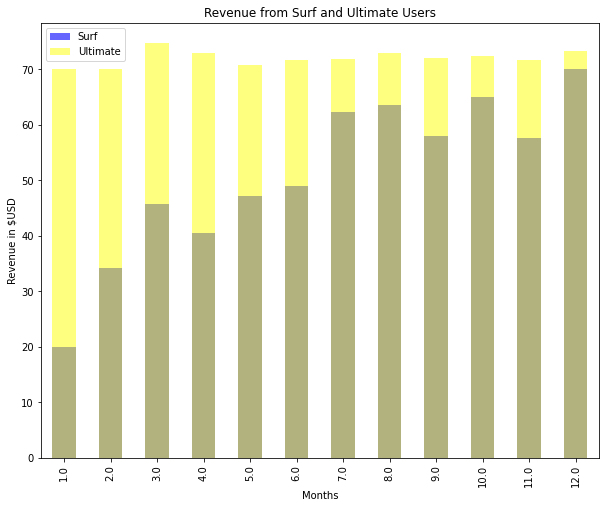

In [50]:
df_plan_month_revenue = user_month_merged.groupby(['plan', 'month'])['revenue'].mean()
# df_plan_month_revenue = user_month_merged.groupby(['plan', 'month'])['revenue'].sum()
print(df_plan_month_revenue)

df_plan_month_revenue['surf'].plot(
    kind='bar',
    title='Revenue from Surf and Ultimate Users',
    ylabel='Revenue in $USD',
    figsize=[10,8], 
    color='blue',
    alpha=.6
)
df_plan_month_revenue['ultimate'].plot(
    kind='bar', 
    color='yellow',
    alpha=.5
)
plt.xlabel('Months')
plt.legend(['Surf', 'Ultimate'])
plt.show()

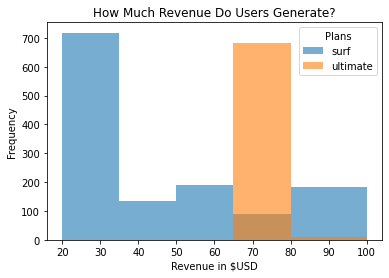

In [58]:
# Compare the average revenue users of each plan provide each month. Plot a histogram.
user_month_merged.groupby('plan')['revenue'].plot(
    kind='hist',
    bins=[20, 35, 50, 65, 80, 100],  
    title='How Much Revenue Do Users Generate?', 
    alpha=.6
)
plt.legend(title='Plans')
plt.xlabel('Revenue in $USD')
plt.show()

In [52]:
# Calculate the mean and the variance of the monthly revenue
print('Revenue Averages per Plan:\n', user_month_merged.groupby('plan')['revenue'].mean())
print('\nVariance per Plan:\n', user_month_merged.groupby('plan')['revenue'].var())
print('\nStandard Deviation per Plan:\n', user_month_merged.groupby('plan')['revenue'].std())
print('\nDescriptive Statistics per Plan:\n', user_month_merged.groupby('plan')['revenue'].describe())
print('\nTotal Revenue per Plan:\n', user_month_merged.groupby('plan')['revenue'].sum())

Revenue Averages per Plan:
 plan
surf        60.331933
ultimate    72.313889
Name: revenue, dtype: float64

Variance per Plan:
 plan
surf        3054.097506
ultimate     129.848486
Name: revenue, dtype: float64

Standard Deviation per Plan:
 plan
surf        55.263890
ultimate    11.395108
Name: revenue, dtype: float64

Descriptive Statistics per Plan:
            count       mean        std   min   25%    50%   75%     max
plan                                                                   
surf      1573.0  60.331933  55.263890  20.0  20.0  40.15  80.0  588.66
ultimate   720.0  72.313889  11.395108  70.0  70.0  70.00  70.0  182.00

Total Revenue per Plan:
 plan
surf        94902.13
ultimate    52066.00
Name: revenue, dtype: float64


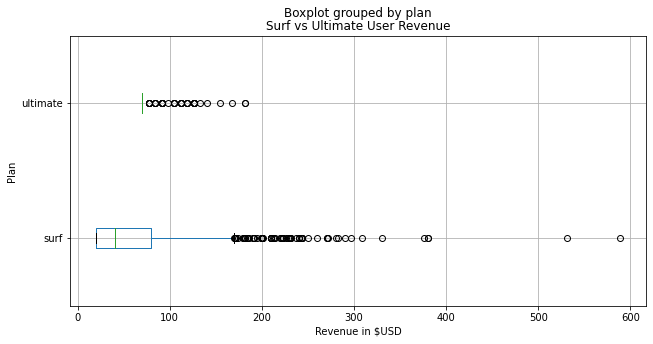

In [57]:
# Plot a boxplot to visualize the distribution of the monthly call duration
user_month_merged.boxplot(
    column='revenue', 
    by='plan',
    figsize=[10,5],
    vert = 0
)

plt.title('Surf vs Ultimate User Revenue')
plt.ylabel('Plan')
plt.xlabel('Revenue in $USD')
plt.show()

<!--[Formulate conclusions about how the revenue differs between the plans.]-->

As we take a closer look at the revenue generated by users per month, we see very distinct differences. For further examination, we looked at the following:

* The Bar Graphs showed clearly showed the difference in revenue for all the months except December with at least a \\$10 difference. The caveat to this is that the base price for the Surf plan starts at \\$20 and the Ultimate plan starts at \\$70, so Surf users would have to exceed their default parameters by quite a bit.
* The Histogram of both plans did not have the same shape and the peaks were not together with the Surf users peaking on the lower end while the Ultimate users were largely around \\$70. 
* With the Descriptive Statistics, we see all the values differ. Again, the entry point to each plan might have a large effect on these values. Also, when we summed the revenue for each plan, the Surf generated more, but they have more than double the amount of users.
* The Boxplot reinforced what the previous visualizations showed, which is there is a difference in the average revenue per user per month. The Surf users tended to create revenue from \\$20 to \\$80, while Ultimate users heavily stayed around \\$70. The latter's entire IQR is at \\$70 and not very spread out.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice vizualisation and good conclusions!
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: we can add boxplot without outliers to get additional insights.
</div>

## Test statistical hypotheses

<!--[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]
-->
We are going to test to see if there is a difference in the average revenue from users of the Ultimate and Surf plans by performing a T-test on the means of the two statistical populations are equal. 
The statistical significance level will be 5%.

<!--[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]-->
<b>H<sub>0</sub></b>: The average revenue is the same between plans.

<b>H<sub>1</sub></b>: The average revenue is different between plans.


In [54]:
# Test the hypotheses
surf_rev = user_month_merged[user_month_merged['plan']=='surf']['revenue']  # .mean()
ultimate_rev = user_month_merged[user_month_merged['plan']=='ultimate']['revenue']  # .mean()
print(surf_rev.std())
print(ultimate_rev.mean())

alpha = .05

results = st.ttest_ind(surf_rev, ultimate_rev, equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

55.2638897104777
72.31388888888888
p-value: 3.6278039040985444e-16
We reject the null hypothesis


<!--[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]
-->
We are going to test to see if there is a difference in the average revenue from users in the NY-NJ area and other regions by performing a T-test on the equality of two population means.
The statistical significance level will be 5%.

<!--[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]
-->
<b>H<sub>0</sub></b>: The average revenue is the same between the NY-NJ area and other regions.

<b>H<sub>1</sub></b>: The average revenue is different among the regions.

In [55]:
# Test the hypotheses
ny_nj_rev = user_month_merged[user_month_merged['region']=='ny-nj']['revenue']  # .mean()
others_rev = user_month_merged[user_month_merged['region']=='']['revenue']  # .mean()
# print(ny_nj_rev)
# print(others_rev)
alpha = .05

results = st.ttest_ind(ny_nj_rev, others_rev, equal_var=False)
print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 0.10430409110751233
We can't reject the null hypothesis


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent.
</div>

## General conclusion

<!--[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]
-->
After gathering and compiling all the data across multiple data set for Megaline, our samples showed the following about the users from the Surf and Ultimate plans:
1. Call Duration: The users' behavior was very similar between the plans. A possibility is that more people text nowadays rather than calling.
2. Text Messaging: We saw that because the alloted number of texts is higher for the Ultimate plan, their users tended to text at an increased rate.
3. Internet Usage: While there were differences depending on the month, the internet usage behavior had some similarites with where users centered around in terms of gigabytes used.
4. Revenue: The comparison made between the revenue from Surf and Ultimate plans showed very different behaviors. A common thread was the initial fee each plan charged; Surf at \\$20 and Ultimate at \\$70. Because of this, the revenue from each plan tended towards their respective initial fee.
5. When we tested to see if there is a difference in the average revenue from users of the Ultimate and Surf plans, we rejected the null hypothesis given the significance level selected. This leads us to conclude that our assumption that the average revenue is the same between plans is most likely incorrect. This was further supported when we calculated the descriptive statistics and graphs on just the revenue per user per month. 
6. When we tested to see if the average revenue is the same between the NY-NJ area and other regions, we got that about 10% of the time, the average revenue from both sets of regions would be different. Thus, we could not reject the null hypothesis. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great final conclusion.
</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Mark, thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- very deep detailed conclusions
    
- good graphs
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
I'm glad to say that your project has been accepted. Keep up the good work, and good luck on the next sprint!
</div>